# Comprensión de datos

Esta segunda fase comprende la recolección inicial de los datos con el objetivo de establecer un
primer contacto con el problema, familiarizarse con ellos, identificar su calidad y establecer las
relaciones más evidentes que permitan definir las primeras hipótesis

## Recolección de datos iniciales

Identificar que datos tenemos, su localización.
se nos ha proporiconado una base de datos en formato csv y  se localiza en el trabajo de evalucion del trabajo final, el data set descargo se ubica en al carpeta de data renombrado como **"crude_bike_buyers.csv"**

## Descripcion de los datos

Este proceso implica establecer volúmenes de datos (número de registros y campos por registro), su identificación,
el significado de cada campo y la descripción del formato inicial.

| **Variables**       | **descripcion**  | **tipo de varible**  |
|-----------------|--------------|------------------|
| ID              | identificador del comprador | numerico entero |
| MARITAL STATUS  | estado civil del comprador | categorico  |
| GENDER          | genero del comprador  |  categorico  |
| Income          | ingresos del comprador en un plazo determinado | numerico entero  |
| Children        | numero de hijos del comprador  |  numerico entero |
| Education       | nivel edcuativo del comprador   | categorico |
| Occupation      | oficio o trabajo del comprador |  categorico |
| Home Owner | el comprador es propietario de una casa | boolean | 
| Cars | numero de vehiculos que posee el comrador | numerico entero |
| Commute Distance | distancia entre la casa del comprador y lugar donde trabaja | categorico | 
| Region | region donde vive el comprador | categorico |
| Age | edad del comprador | numerico entero | 
| Purchased Bike | estado de compra o no de una bicicleta | categorico |

## Exploración de los datos

### Carga de datos con pandas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df_crude = pd.read_csv('../data/crude_bike_buyers.csv')

### Inspeccion de datos

In [3]:
df_crude.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [4]:
df_crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [5]:
list(df_crude.columns.values)

['ID',
 'Marital Status',
 'Gender',
 'Income',
 'Children',
 'Education',
 'Occupation',
 'Home Owner',
 'Cars',
 'Commute Distance',
 'Region',
 'Age',
 'Purchased Bike']

In [6]:
columnas_categoricas=list(filter(lambda columm : pd.api.types.is_object_dtype(df_crude[columm].dtype) ,[ column_name for column_name in df_crude.columns.values ]))
columnas_categoricas

['Marital Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Purchased Bike']

In [7]:
[{ columna: list(df_crude[columna].unique())} for columna in columnas_categoricas]

[{'Marital Status': ['Married', 'Single', nan]},
 {'Gender': ['Female', 'Male', nan]},
 {'Education': ['Bachelors',
   'Partial College',
   'High School',
   'Partial High School',
   'Graduate Degree']},
 {'Occupation': ['Skilled Manual',
   'Clerical',
   'Professional',
   'Manual',
   'Management']},
 {'Home Owner': ['Yes', 'No', nan]},
 {'Commute Distance': ['0-1 Miles',
   '2-5 Miles',
   '5-10 Miles',
   '1-2 Miles',
   '10+ Miles']},
 {'Region': ['Europe', 'Pacific', 'North America']},
 {'Purchased Bike': ['No', 'Yes']}]

vamos a realizar unas tablas y graficos de frecuencia para esta variables categoricas

#### Marital Status

In [8]:
df_crude['Marital Status'].value_counts()

Married    535
Single     458
Name: Marital Status, dtype: int64

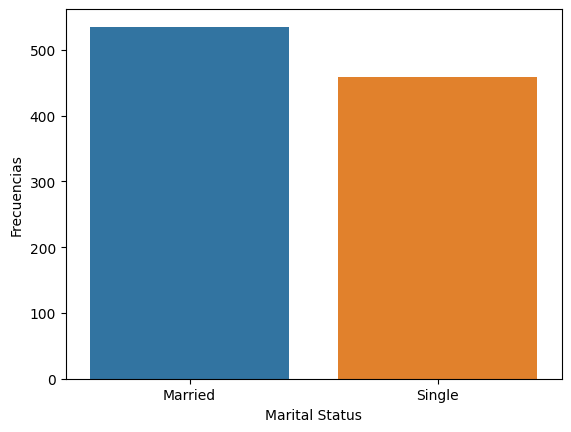

In [9]:
df_frecuencias = df_crude['Marital Status'].value_counts()
df_frecuencias = pd.DataFrame({'Marital Status':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Marital Status',y='Frecuencias')


#### Gender

In [10]:
df_crude['Gender'].value_counts()

Male      500
Female    489
Name: Gender, dtype: int64

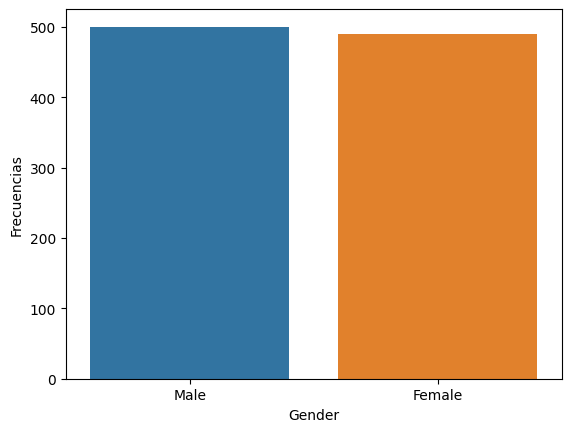

In [11]:
df_frecuencias = df_crude['Gender'].value_counts()
df_frecuencias = pd.DataFrame({'Gender':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Gender',y='Frecuencias')


#### Education

In [12]:
df_crude['Education'].value_counts()

Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64

[Text(0, 0, 'Bachelors'),
 Text(1, 0, 'Partial College'),
 Text(2, 0, 'High School'),
 Text(3, 0, 'Graduate Degree'),
 Text(4, 0, 'Partial High School')]

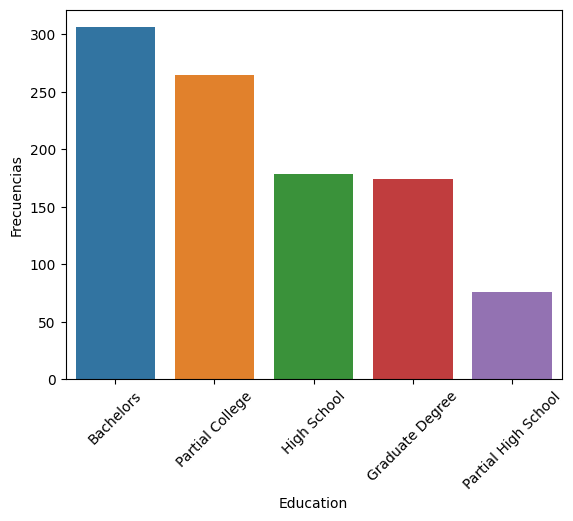

In [13]:
df_frecuencias = df_crude['Education'].value_counts()
df_frecuencias = pd.DataFrame({'Education':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Education',y='Frecuencias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#### Occupation

In [14]:
df_crude['Occupation'].value_counts()

Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64

[Text(0, 0, 'Professional'),
 Text(1, 0, 'Skilled Manual'),
 Text(2, 0, 'Clerical'),
 Text(3, 0, 'Management'),
 Text(4, 0, 'Manual')]

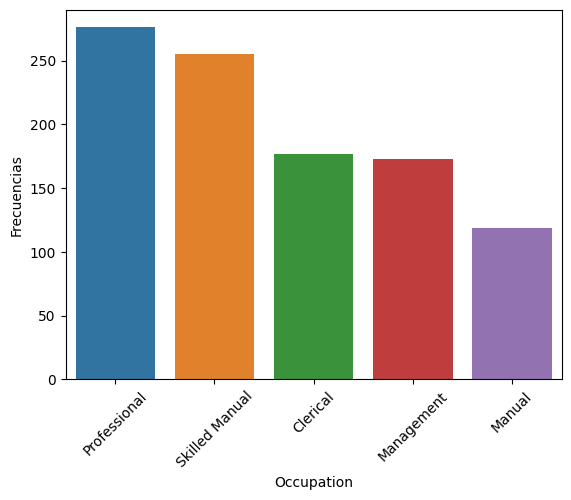

In [15]:
df_frecuencias = df_crude['Occupation'].value_counts()
df_frecuencias = pd.DataFrame({'Occupation':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Occupation',y='Frecuencias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#### Home Owner

In [16]:
df_crude['Home Owner'].value_counts()

Yes    682
No     314
Name: Home Owner, dtype: int64

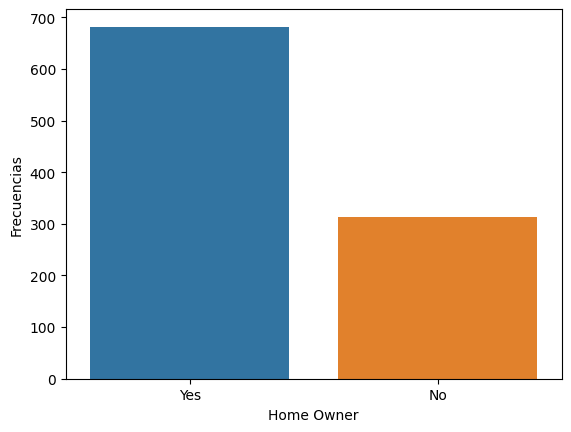

In [17]:
df_frecuencias = df_crude['Home Owner'].value_counts()
df_frecuencias = pd.DataFrame({'Home Owner':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Home Owner',y='Frecuencias')

#### Commute Distance

In [18]:
serie= df_crude['Commute Distance'].value_counts()
serie=serie.reindex(['0-1 Miles','1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles'])
serie

0-1 Miles     366
1-2 Miles     169
2-5 Miles     162
5-10 Miles    192
10+ Miles     111
Name: Commute Distance, dtype: int64

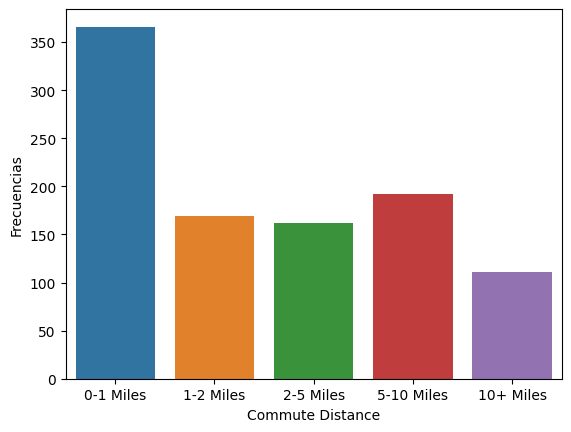

In [19]:
df_frecuencias = pd.DataFrame({'Commute Distance':serie.index,'Frecuencias':serie.values})
ax = sns.barplot(df_frecuencias,x='Commute Distance',y='Frecuencias')

#### Region

In [20]:
serie= df_crude['Region'].value_counts()
serie

North America    508
Europe           300
Pacific          192
Name: Region, dtype: int64

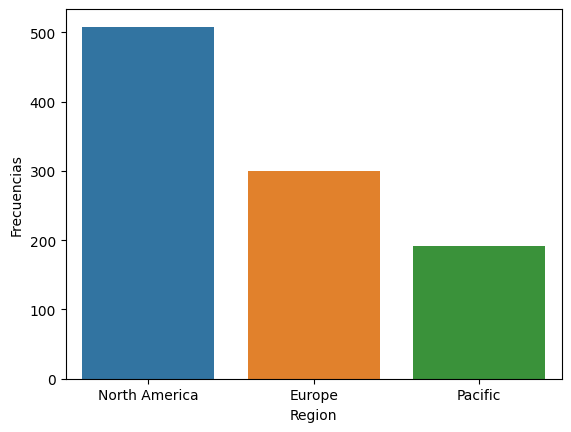

In [21]:
df_frecuencias = pd.DataFrame({'Region':serie.index,'Frecuencias':serie.values})
ax = sns.barplot(df_frecuencias,x='Region',y='Frecuencias')

#### Purshased Bike

In [42]:
serie= df_crude['Purchased Bike'].value_counts()
serie

No     519
Yes    481
Name: Purchased Bike, dtype: int64

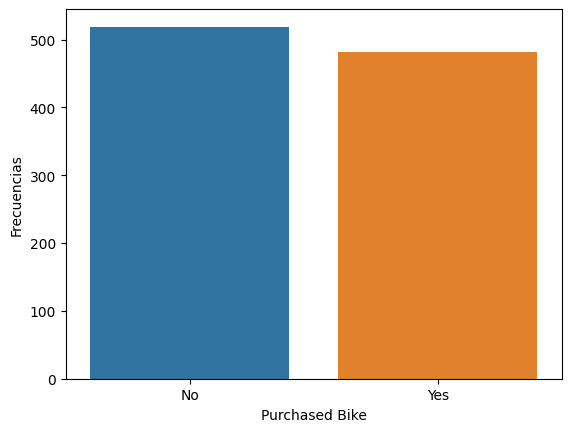

In [43]:
df_frecuencias = pd.DataFrame({'Purchased Bike':serie.index,'Frecuencias':serie.values})
ax = sns.barplot(df_frecuencias,x='Purchased Bike',y='Frecuencias')

In [22]:
columnas_numericas=list(filter(lambda columm : pd.api.types.is_float_dtype(df_crude[columm].dtype) ,[ column_name for column_name in df_crude.columns.values ]))
columnas_numericas

['Income', 'Children', 'Cars', 'Age']

vamos a realizar tablas  y graficos de frecuencia para estas variables numericas

#### Age

In [40]:
df_crude_dropNan = df_crude.dropna()
serie = df_crude_dropNan['Age']

intervalos = np.histogram_bin_edges(serie,bins='fd').astype(int)
intervalos_cortados = pd.cut(serie,bins=intervalos)
table_frecuencais = intervalos_cortados.value_counts()
table_frecuencais.sort_index()

(25, 28]     60
(28, 31]     65
(31, 35]    116
(35, 38]    100
(38, 41]     83
(41, 45]    122
(45, 48]     88
(48, 51]     67
(51, 55]     80
(55, 58]     35
(58, 62]     56
(62, 65]     28
(65, 68]     26
(68, 72]     14
(72, 75]      4
(75, 78]      2
(78, 82]      1
(82, 85]      0
(85, 89]      1
Name: Age, dtype: int64

[Text(0, 0, '(25, 28]'),
 Text(1, 0, '(28, 31]'),
 Text(2, 0, '(31, 35]'),
 Text(3, 0, '(35, 38]'),
 Text(4, 0, '(38, 41]'),
 Text(5, 0, '(41, 45]'),
 Text(6, 0, '(45, 48]'),
 Text(7, 0, '(48, 51]'),
 Text(8, 0, '(51, 55]'),
 Text(9, 0, '(55, 58]'),
 Text(10, 0, '(58, 62]'),
 Text(11, 0, '(62, 65]'),
 Text(12, 0, '(65, 68]'),
 Text(13, 0, '(68, 72]'),
 Text(14, 0, '(72, 75]'),
 Text(15, 0, '(75, 78]'),
 Text(16, 0, '(78, 82]'),
 Text(17, 0, '(82, 85]'),
 Text(18, 0, '(85, 89]')]

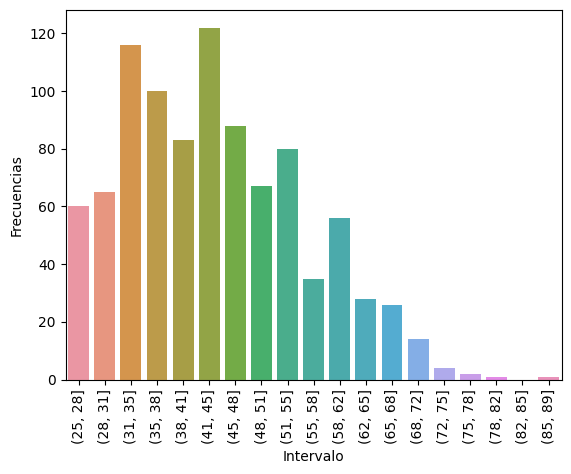

In [38]:
df_frecuencias = pd.DataFrame({'Intervalo':table_frecuencais.index,'Frecuencias':table_frecuencais.values})

ax = sns.barplot(df_frecuencias,x='Intervalo',y='Frecuencias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### Cars

In [25]:
df_crude['Cars'].value_counts()

2.0    342
1.0    267
0.0    238
3.0     85
4.0     59
Name: Cars, dtype: int64

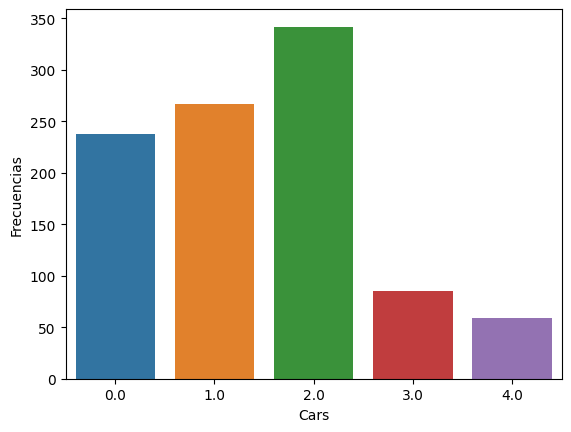

In [26]:
df_frecuencias=df_crude['Cars'].value_counts()

df_frecuencias = pd.DataFrame({'Cars':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Cars',y='Frecuencias')

#### Children

In [27]:
df_crude['Children'].value_counts()

0.0    274
2.0    209
1.0    169
3.0    133
4.0    126
5.0     81
Name: Children, dtype: int64

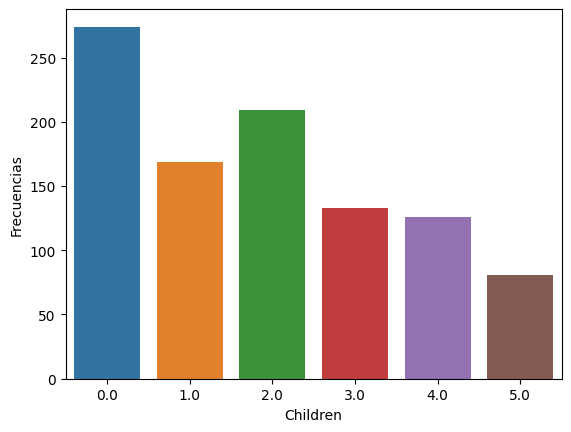

In [28]:
df_frecuencias=df_crude['Children'].value_counts()

df_frecuencias = pd.DataFrame({'Children':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Children',y='Frecuencias')

#### Income

In [29]:
df_crude['Income'].value_counts()

60000.0     165
40000.0     153
30000.0     134
70000.0     123
80000.0      90
20000.0      74
10000.0      73
50000.0      40
90000.0      38
130000.0     32
100000.0     29
120000.0     17
110000.0     16
150000.0      4
160000.0      3
170000.0      3
Name: Income, dtype: int64

[Text(0, 0, '10000.0'),
 Text(1, 0, '20000.0'),
 Text(2, 0, '30000.0'),
 Text(3, 0, '40000.0'),
 Text(4, 0, '50000.0'),
 Text(5, 0, '60000.0'),
 Text(6, 0, '70000.0'),
 Text(7, 0, '80000.0'),
 Text(8, 0, '90000.0'),
 Text(9, 0, '100000.0'),
 Text(10, 0, '110000.0'),
 Text(11, 0, '120000.0'),
 Text(12, 0, '130000.0'),
 Text(13, 0, '150000.0'),
 Text(14, 0, '160000.0'),
 Text(15, 0, '170000.0')]

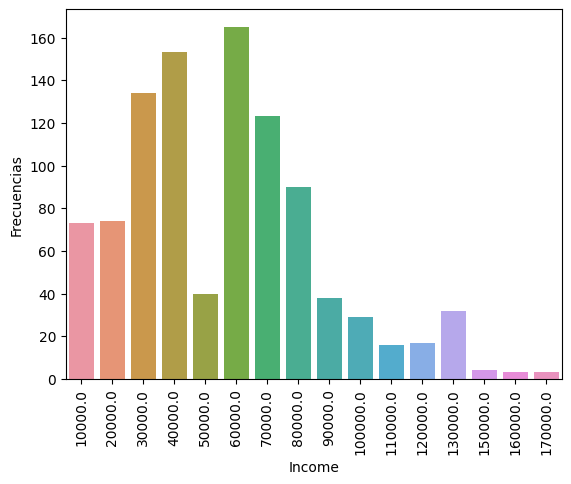

In [30]:
df_frecuencias= df_crude['Income'].value_counts()
df_frecuencias = pd.DataFrame({'Income':df_frecuencias.index,'Frecuencias':df_frecuencias.values})
ax = sns.barplot(df_frecuencias,x='Income',y='Frecuencias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [31]:
df_crude.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


## Verificar la calidad de los datos

In [32]:
numero_de_na=df_crude.isna().sum()
numero_de_na


ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [33]:
percentage_of_columns=list(map(lambda percentage : round( percentage/1000*100,3), df_crude.isna().sum().to_list()))
df_numero_na=numero_de_na.to_frame(name='number na')
df_numero_na['percentage']=percentage_of_columns
df_numero_na

,number na,percentage
ID,0,0.0
Marital Status,7,0.7
Gender,11,1.1
Income,6,0.6
Children,8,0.8
Education,0,0.0
Occupation,0,0.0
Home Owner,4,0.4
Cars,9,0.9
Commute Distance,0,0.0


In [44]:
numero_de_null=df_crude.isnull().sum()
numero_de_null

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [45]:
percentage_of_columns=list(map(lambda percentage : round( percentage/1000*100,3), df_crude.isnull().sum().to_list()))
df_numero_null=numero_de_na.to_frame(name='null')
df_numero_null['percentage']=percentage_of_columns
df_numero_null

,null,percentage
ID,0,0.0
Marital Status,7,0.7
Gender,11,1.1
Income,6,0.6
Children,8,0.8
Education,0,0.0
Occupation,0,0.0
Home Owner,4,0.4
Cars,9,0.9
Commute Distance,0,0.0


<Axes: >

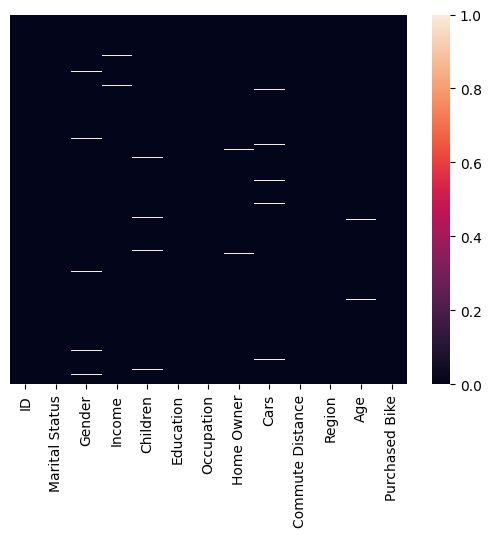

In [62]:
sns.heatmap(df_crude.isnull(),yticklabels=False)


In [67]:
cuantiles = df_crude.quantile([0.25, 0.75])
cuantiles

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4256\3026913961.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuantiles = df_crude.quantile([0.25, 0.75])


,ID,Income,Children,Cars,Age
0.25,15290.75,30000.0,0.0,1.0,35.0
0.75,24470.75,70000.0,3.0,2.0,52.0


<Axes: xlabel='Income'>

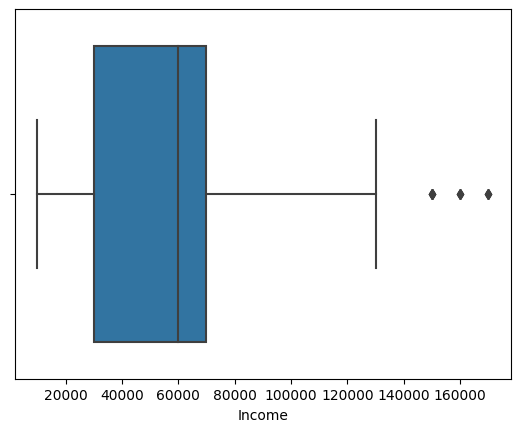

In [68]:
sns.boxplot(df_crude,x='Income')

<Axes: xlabel='Children'>

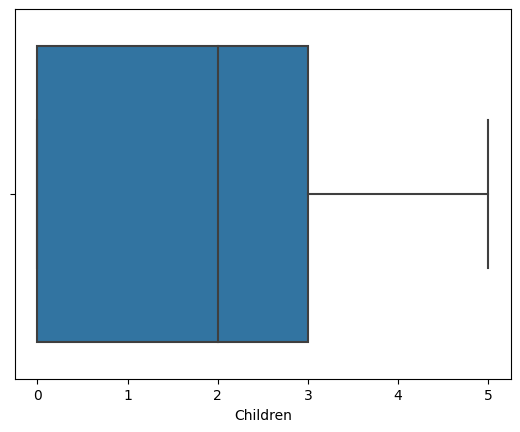

In [69]:
sns.boxplot(df_crude,x='Children')

<Axes: xlabel='Age'>

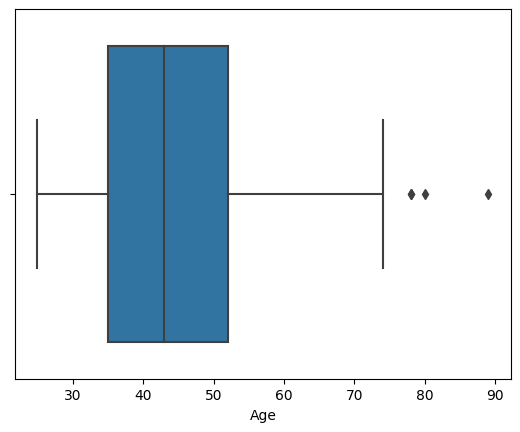

In [70]:
sns.boxplot(df_crude,x='Age')

# Conclusiones